# Lecture 18: The Bootstrap 
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [4]:
import numpy as np 
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### Exercise 1 - Bootstrapped Confidence Intervals for the Mean 
*** 

In this exercise you will experiment with empirical bootstrap techniques to compute confidence intervals the mean of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Write down the expected value, variance, and standard deviation of $X \sim Exp(5)$.  You can look them up on [Wiki](https://en.wikipedia.org/wiki/Exponential_distribution) if you need to. 

In [1]:
th_mean = 1/5
th_std = 1/5
th_var = 5**-2

**Part B**: The variable $\texttt{sample}$ below consists of $500$ samples from $Exp(5)$.  Complete the function bootstrapped_mean below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the mean at the 95% confidence level.  

In [5]:
sample = np.random.exponential(1/5, size=500)
# n = 500

In [7]:
np.random.choice(sample,size=(500,5000))

In [30]:
# num_boots is M from the lecture slides
def bootstrapped_mean(sample, num_boots=5000, alpha=0.05):
    # Create M resamples with replacement
    n = len(sample)
    resamples = np.random.choice(sample,size=(num_boots,n))
    # For Each compute the quantity of interest
    means = np.mean(resamples,axis=1)
    # Find the alpha/2 and 1-alpha/2 percentiles of this distribution
    lower = np.percentile(means,100*alpha/2,axis=0)
    upper = np.percentile(means,100*(1-alpha/2),axis=0)
    # That's the CI    
    CI = np.array([lower,upper]) # This is terrible! Your code should replace this with a real calculation.

    return CI 
    
bootstrapped_mean(sample)

array([0.18551043, 0.22276275])

**Part C**: Use the sample mean of $\texttt{sample}$ and the known standard deviation of the distribution to compute a traditional 95% confidence interval for the mean of the distribution.  Compare your traditional confidence interval to the bootstrapped confidence interval returned by your code. 

In [31]:
# CI by CLT for mean
# xbar +- z_alpha_over_2 * std/sqrt(n)
xbar = np.mean(sample)
s = np.std(sample,ddof=1)
pm = stats.norm.ppf(1-0.05/2)*s/np.sqrt(len(sample))

print(np.array([xbar-pm,xbar+pm]))

[0.18579452 0.22257285]


**Part D**: Modify the code you wrote in **Part B** to also plot a histogram of the boostrapped sample means along with some graphical representation of the calculated confidence interval. 

array([0.18631669, 0.22250027])

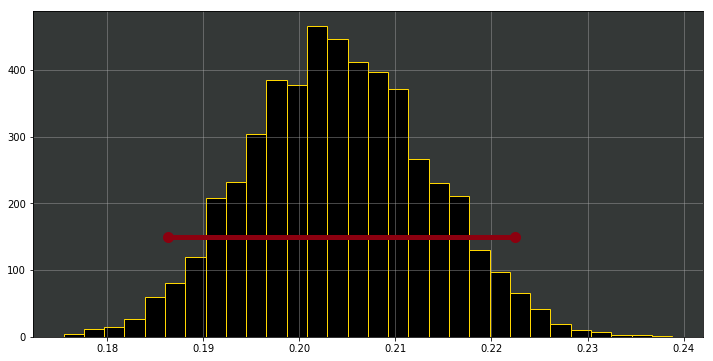

In [45]:
# num_boots is M from the lecture slides
def bootstrapped_mean(sample, num_boots=5000, alpha=0.05):
    # Create M resamples with replacement
    n = len(sample)
    resamples = np.random.choice(sample,size=(num_boots,n))
    # For Each compute the quantity of interest
    means = np.mean(resamples,axis=1)
    # Find the alpha/2 and 1-alpha/2 percentiles of this distribution
    lower = np.percentile(means,100*alpha/2,axis=0)
    upper = np.percentile(means,100*(1-alpha/2),axis=0)
    # That's the CI    
    CI = np.array([lower,upper]) # This is terrible! Your code should replace this with a real calculation.
    
    # Create a plot
    fig,ax = plt.subplots(1,1,figsize=(12,6))
    ax.set_facecolor('xkcd:charcoal')
    plt.hist(means,density=False,bins=30,color='black',edgecolor='gold')
    plt.grid(alpha=0.5)
    plt.plot(CI,150*np.ones(2),'o-',color='xkcd:crimson',linewidth=5,markersize=10)
    
    return CI 
    
bootstrapped_mean(sample)

### Exercise 2 - Bootstrapped Confidence Intervals for the Variance
*** 

In this exercise you will experiment with empirical bootstrap techniques to compute confidence intervals for various statistics of the variance of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Complete the function bootstrapped_var below, to draw at least $5000$ bootstrapped samples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the variance at the 95% confidence level.  You should be able to copy paste your code from Exercise 1. Use your function to find the 95% bootstrapped CI for the data stored in $\texttt{sample}$ from Exercise 1. 

[0.02703816 0.04077766]
0.03351498714981917


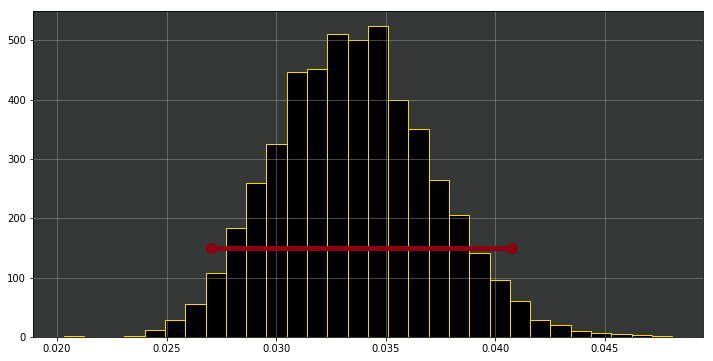

In [7]:
# num_boots is M from the lecture slides
def bootstrapped_var(sample, num_boots=5000, alpha=0.05):
    # Create M resamples with replacement
    n = len(sample)
    resamples = np.random.choice(sample,size=(num_boots,n))
    # For Each compute the quantity of interest
    v = np.var(resamples,axis=1)
    # Find the alpha/2 and 1-alpha/2 percentiles of this distribution
    lower = np.percentile(v,100*alpha/2,axis=0)
    upper = np.percentile(v,100*(1-alpha/2),axis=0)
    # That's the CI    
    CI = np.array([lower,upper]) # This is terrible! Your code should replace this with a real calculation.
    
    # Create a plot
    fig,ax = plt.subplots(1,1,figsize=(12,6))
    ax.set_facecolor('xkcd:charcoal')
    plt.hist(v,density=False,bins=30,color='black',edgecolor='gold')
    plt.grid(alpha=0.5)
    plt.plot(CI,150*np.ones(2),'o-',color='xkcd:crimson',linewidth=5,markersize=10)

    return CI 
    
print(bootstrapped_var(sample))
print(np.var(sample))

**Part B**: Does your 95% bootstrapped confidence interval cover the true variance of the population? 

In [49]:
print(1/25)

0.04


### Exercise 3 - Empirical Coverage of Bootstrapped Confidence Intervals  
*** 

Complete the function CI_test below to test the coverage of the bootstrapped confidence intervals at the 95% confidence level for the mean of the population that $\texttt{sample}$ is drawn from.  Recall that you know that the true sample mean is $1/\lambda = 0.2$.  

In [ ]:
def CI_test(sample, num_CIs=100, num_boots=5000):
    return 1.0 # TODO, this is just a fill-value

### Exercise 4 - Parametric Bootstrap for the Exponential Parameter 
*** 

In this exercise you will experiment with the parametric bootstrap technique to compute confidence intervals for various statistics of the exponential distribution with parameter $\lambda = 5$.  

**Part A**: Complete the function bootstrapped_lam below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$ and compute a bootstrapped confidence interval for the exponential parameter $\lambda$.  Recall from class that a good estimator for $\lambda$ is $1/x$ where $x$ is assumed to come from $Exp(\lambda)$. 

**Part B**: Complete the function parametric_stdev below, to draw at least $5000$ bootstrapped resamples (with replacement) from the empirical distribution defined by $\texttt{sample}$.  From each bootstrapped resample, estimate the exponential parameter $\lambda$, then transform the estimate of $\lambda$ to the variance of the exponential distribution.  With your bootstrapped estimates of $\sigma$, compute a 95% confidence interval for the variance.  How does this confidence interval compared to the one computed in Exercise 2? 


In [ ]:
def parametric_stdev(sample, num_boots=5000):
    return np.array([0,1]) # TODO, this is just a fill-value
    
parametric_stdev(sample)